In [ ]:
import numpy as np
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving last - Copy of ww (5).csv to last - Copy of ww (5).csv


In [ ]:
df = pd.read_csv('last - Copy of ww (5).csv')
df.head(10)

translateded  \
0  yes ever used a healthy application some use f...   
1  continue to get pregnant to tell to better kno...   
2  pregnancy does use a lot of some of my primary...   
3  pregnant paka bumil flow friend flow for ordin...   
4  difficult different applications like differen...   
5  for example  don t use the point of using the ...   
6  what is the name of the high flower weight gra...   
7  continue to make a vaccine reminding the vacci...   
8  what vaccine is next month  what help we remem...   
9         long use of my primary not to pay children   

                                      processed_text  Behavioural_Intention  \
0  iya pernah guna aplikasi sehat beberapa pakai ...                    NaN   
1  terus hamil hamil suruh biar lebih tahu detail...                    NaN   
2  hamil memang banyak pakai beberapa anak primak...                    NaN   
3  hamil paka teman bumil flow sekali buat menstr...                    NaN   
4  sulit paling beda aplikasi tidak yakin suka be...                    NaN   
5  misal tidak pakai titik pakai titik paling ada...                    NaN   
6        apa nama kembang tinggi berat grafik tumbuh                    NaN   
7  terus buat vaksin ngingetin vaksin lupa suka lupa                    NaN   
8  vaksin apa bulan depan apa nah lebih bantu ara...                    NaN   
9                lama pakai primaku tidak bayar anak                    NaN   

   Trust  Awareness  Health_Awareness  Technostress  Self_Efficacy  \
0    NaN        NaN               NaN           NaN            NaN   
1    NaN        NaN               1.0           NaN            NaN   
2    NaN        NaN               NaN           NaN            NaN   
3    NaN        NaN               NaN           NaN            NaN   
4    NaN        NaN               NaN           2.0            2.0   
5    NaN        NaN               NaN           NaN            NaN   
6    NaN        NaN               NaN           NaN            NaN   
7    NaN        NaN               NaN           NaN            NaN   
8    NaN        NaN               NaN           NaN            NaN   
9    NaN        NaN               NaN           NaN            NaN   

   Prive_value  Perceived_enjoyment  Habit  
0          NaN                  NaN    NaN  
1          NaN                  NaN    NaN  
2          NaN                  NaN    NaN  
3          NaN                  NaN    NaN  
4          NaN                  NaN    NaN  
5          NaN                  NaN    NaN  
6          NaN                  NaN    NaN  
7          NaN                  NaN    2.0  
8          NaN                  NaN    NaN  
9          1.0                  NaN    NaN

In [ ]:
# Menghapus kolom-kolom kecuali 'processed_text'
df = df[['processed_text',
 'Behavioural_Intention',
 'Trust',
 'Awareness',
 'Health_Awareness',
 'Technostress',
 'Self_Efficacy',
 'Prive_value',
 'Perceived_enjoyment',
 'Habit']]


In [ ]:
# Memilih kolom kecuali kolom 'Content'
column_list = [col for col in df.columns if col != 'processed_text']

# Mengubah nilai yang tidak bisa dikonversi menjadi NaN
df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

# Mengganti nilai NaN dengan 0
df[column_list] = df[column_list].fillna(0)

# Mengubah tipe data kolom dalam column_list menjadi int64
df[column_list] = df[column_list].astype('int64')

column_list


['Behavioural_Intention',
 'Trust',
 'Awareness',
 'Health_Awareness',
 'Technostress',
 'Self_Efficacy',
 'Prive_value',
 'Perceived_enjoyment',
 'Habit']

In [ ]:
df.dtypes

processed_text           object
Behavioural_Intention     int64
Trust                     int64
Awareness                 int64
Health_Awareness          int64
Technostress              int64
Self_Efficacy             int64
Prive_value               int64
Perceived_enjoyment       int64
Habit                     int64
dtype: object

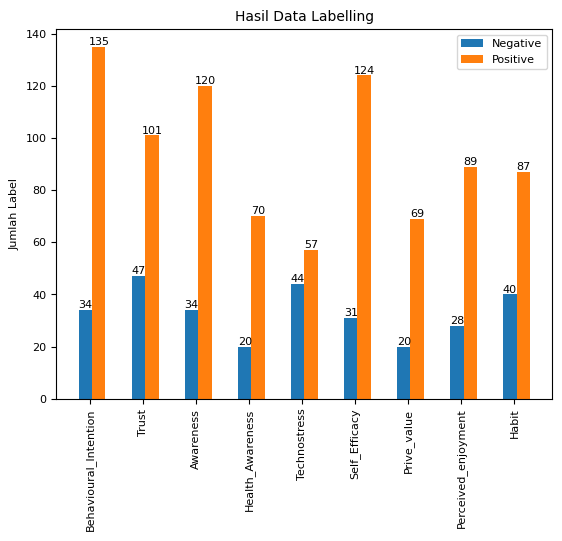

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Faktor-faktor yang akan diplot
factors = ['Behavioural_Intention', 'Trust', 'Awareness',
           'Health_Awareness', 'Technostress',
           'Self_Efficacy', 'Prive_value', 'Perceived_enjoyment',
           'Habit']

# Menghitung nilai negatif dan positif
positif = [(df[factor] == 1).sum() for factor in factors]
negatif = [(df[factor] == 2).sum() for factor in factors]

# Menentukan posisi pada sumbu x
x_axis = np.arange(len(factors))
width = 0.25

# Membuat plot
bars_negatif = plt.bar(x_axis, negatif, width, label='Negative')
bars_positif = plt.bar(x_axis + width, positif, width, label='Positive')

# Menyesuaikan label pada sumbu x
plt.xticks(x_axis + width / 3, factors, rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Menambah label dan judul dengan font yang lebih kecil
plt.ylabel("Jumlah Label", fontsize=8)
plt.title("Hasil Data Labelling", fontsize=10)
plt.legend(fontsize=8)

# Menambahkan nilai pada masing-masing bar
for bar in bars_negatif:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=8)

for bar in bars_positif:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=8)

# Menampilkan plot
plt.show()


In [ ]:
# Mengambil kolom yang sesuai untuk label
# Mengambil kolom teks yang telah diproses
texts = df['processed_text'].tolist()
label_columns = [col for col in df.columns if col not in ['processed_text']]
labels = df[label_columns].values

In [ ]:
# Filter data untuk menghapus sampel dengan label 0
mask = np.any(labels == 1, axis=1) | np.any(labels == 2, axis=1)
filtered_labels = labels[mask]
filtered_texts = [texts[i] for i in range(len(texts)) if mask[i]]

In [ ]:
len(df[mask])

727

In [ ]:
# Verifikasi hasil
print("Number of original samples:", len(texts))
print("Number of filtered samples:", len(filtered_texts))
print("Shape of original labels:", labels.shape)
print("Shape of filtered labels:", filtered_labels.shape)

Number of original samples: 1440
Number of filtered samples: 727
Shape of original labels: (1440, 9)
Shape of filtered labels: (727, 9)


In [ ]:
# Mengonversi teks dan label yang difilter kembali ke DataFrame
df_filtered = pd.DataFrame({'processed_text': filtered_texts})
for idx, col in enumerate(label_columns):
    df_filtered[col] = filtered_labels[:, idx]

In [ ]:
df_onehot1 = pd.get_dummies(df_filtered, columns=label_columns)
df_onehot1.head()

processed_text  Behavioural_Intention_0  \
0  terus hamil hamil suruh biar lebih tahu detail...                     True   
1  sulit paling beda aplikasi tidak yakin suka be...                     True   
2  terus buat vaksin ngingetin vaksin lupa suka lupa                     True   
3                lama pakai primaku tidak bayar anak                     True   
4  terus teman bumil tidak bayar beberapa fitur b...                     True   

   Behavioural_Intention_1  Behavioural_Intention_2  Trust_0  Trust_1  \
0                    False                    False     True    False   
1                    False                    False     True    False   
2                    False                    False     True    False   
3                    False                    False     True    False   
4                    False                    False     True    False   

   Trust_2  Awareness_0  Awareness_1  Awareness_2  ...  Self_Efficacy_2  \
0    False         True        False        False  ...            False   
1    False         True        False        False  ...             True   
2    False         True        False        False  ...            False   
3    False         True        False        False  ...            False   
4    False        False        False         True  ...            False   

   Prive_value_0  Prive_value_1  Prive_value_2  Perceived_enjoyment_0  \
0           True          False          False                   True   
1           True          False          False                   True   
2           True          False          False                   True   
3          False           True          False                   True   
4          False          False           True                   True   

   Perceived_enjoyment_1  Perceived_enjoyment_2  Habit_0  Habit_1  Habit_2  
0                  False                  False     True    False    False  
1                  False                  False     True    False    False  
2                  False                  False    False    False     True  
3                  False                  False     True    False    False  
4                  False                  False     True    False    False  

[5 rows x 28 columns]

In [ ]:
# Hapus faktor yang berakhiran _0
columns_to_drop = [col for col in df_onehot1.columns if col.endswith('_0')]
df_onehot2 = df_onehot1.drop(columns=columns_to_drop)

In [ ]:
# Siapkan data teks dan label
texts = df_onehot2['processed_text'].tolist()
label_columns_onehot = [col for col in df_onehot2.columns if col not in ['processed_text']]
labels = df_onehot2[label_columns_onehot].values

In [ ]:
# Preprocessing data
vocab_size = 5000
# Tokenisasi dan padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
max_length = 100
padded_sequences = pad_sequences(sequences, truncating='pre', padding='pre', maxlen=max_length)

In [ ]:
# Split Data
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
# Periksa bentuk data setelah split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (581, 100)
Shape of y_train: (581, 18)
Shape of X_val: (146, 100)
Shape of y_val: (146, 18)


In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model.build(input_shape=(None, max_length))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,738 (1.93 MB)

 Trainable params: 504,226 (1.92 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8, callbacks=[reduce_lr])

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.0665 - loss: 2.2603 - val_accuracy: 0.0959 - val_loss: 0.8886 - learning_rate: 0.0010
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.0913 - loss: 0.7116 - val_accuracy: 0.0959 - val_loss: 0.4782 - learning_rate: 0.0010
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.1414 - loss: 0.4255 - val_accuracy: 0.0959 - val_loss: 0.3448 - learning_rate: 0.0010
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.2398 - loss: 0.3200 - val_accuracy: 0.2123 - val_loss: 0.2909 - learning_rate: 0.0010
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.3677 - loss: 0.2521 - val_accuracy: 0.3699 - val_loss: 0.2588 - learning_rate: 0.0010
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4726 - loss: 0.2169 - val_accuracy: 0.5548 - val_loss: 0.2192 - learning_rate: 0.0010
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.5379 - loss: 0.2

In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model16 = Sequential()
model16.add(Embedding(input_dim=vocab_size, output_dim=50))
model16.add(Bidirectional(LSTM(128)))
model16.add(Dropout(0.3))
model16.add(BatchNormalization())

model16.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model16.add(Dropout(0.3))
model16.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model16.build(input_shape=(None, max_length))

# Compile the model
model16.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model16.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,738 (1.93 MB)

 Trainable params: 504,226 (1.92 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history16 = model16.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=16, callbacks=[reduce_lr])

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.0413 - loss: 2.6084 - val_accuracy: 0.1781 - val_loss: 1.3399 - learning_rate: 0.0010
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.0622 - loss: 1.1122 - val_accuracy: 0.0959 - val_loss: 0.7956 - learning_rate: 0.0010
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.1275 - loss: 0.6371 - val_accuracy: 0.0959 - val_loss: 0.5665 - learning_rate: 0.0010
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.1066 - loss: 0.4587 - val_accuracy: 0.0890 - val_loss: 0.3844 - learning_rate: 0.0010
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.1189 - loss: 0.3661 - val_accuracy: 0.1233 - val_loss: 0.3422 - learning_rate: 0.0010
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.1733 - loss: 0.3135 - val_accuracy: 0.1986 - val_loss: 0.3078 - learning_rate: 0.0010
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.2282 - loss: 0.2809 -

In [ ]:
# Define the model
num_classes = y_train.shape[1]
vocab_size = 5000
max_length = 100

# Build the model
model32 = Sequential()
model32.add(Embedding(input_dim=vocab_size, output_dim=50))
model32.add(Bidirectional(LSTM(128)))
model32.add(Dropout(0.3))
model32.add(BatchNormalization())

model32.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model32.add(Dropout(0.3))
model32.add(Dense(num_classes, activation='sigmoid'))

# Memanggil model build dengan input shape yang sesuai
model32.build(input_shape=(None, max_length))

# Compile the model
model32.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model32.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 50)             │         250,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         183,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 18)                  │           4,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,738 (1.93 MB)

 Trainable params: 504,226 (1.92 MB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history32 = model32.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32, callbacks=[reduce_lr])

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 659ms/step - accuracy: 0.0517 - loss: 2.8686 - val_accuracy: 0.0959 - val_loss: 1.9797 - learning_rate: 0.0010
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.0844 - loss: 1.6979 - val_accuracy: 0.0959 - val_loss: 1.3116 - learning_rate: 0.0010
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.1146 - loss: 1.1115 - val_accuracy: 0.1164 - val_loss: 0.9262 - learning_rate: 0.0010
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.1130 - loss: 0.7737 - val_accuracy: 0.1781 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.1307 - loss: 0.5695 - val_accuracy: 0.1781 - val_loss: 0.5835 - learning_rate: 0.0010
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.1509 - loss: 0.4500 - val_accuracy: 0.1781 - val_loss: 0.5268 - learning_rate: 0.0010
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.1691 - loss: 0.3756 

In [ ]:
# Evaluasi pada data testing
loss, accuracy = model.evaluate(X_val, y_val)
loss16, accuracy16 = model16.evaluate(X_val, y_val)
loss32, accuracy32 = model32.evaluate(X_val, y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7192 - loss: 0.1199
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7580 - loss: 0.1187
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.7032 - loss: 0.1536


In [ ]:
# Evaluasi pada data testing
loss, accuracy = model16.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8122 - loss: 0.0591
Loss: 0.0618322491645813, Accuracy: 0.7951807379722595


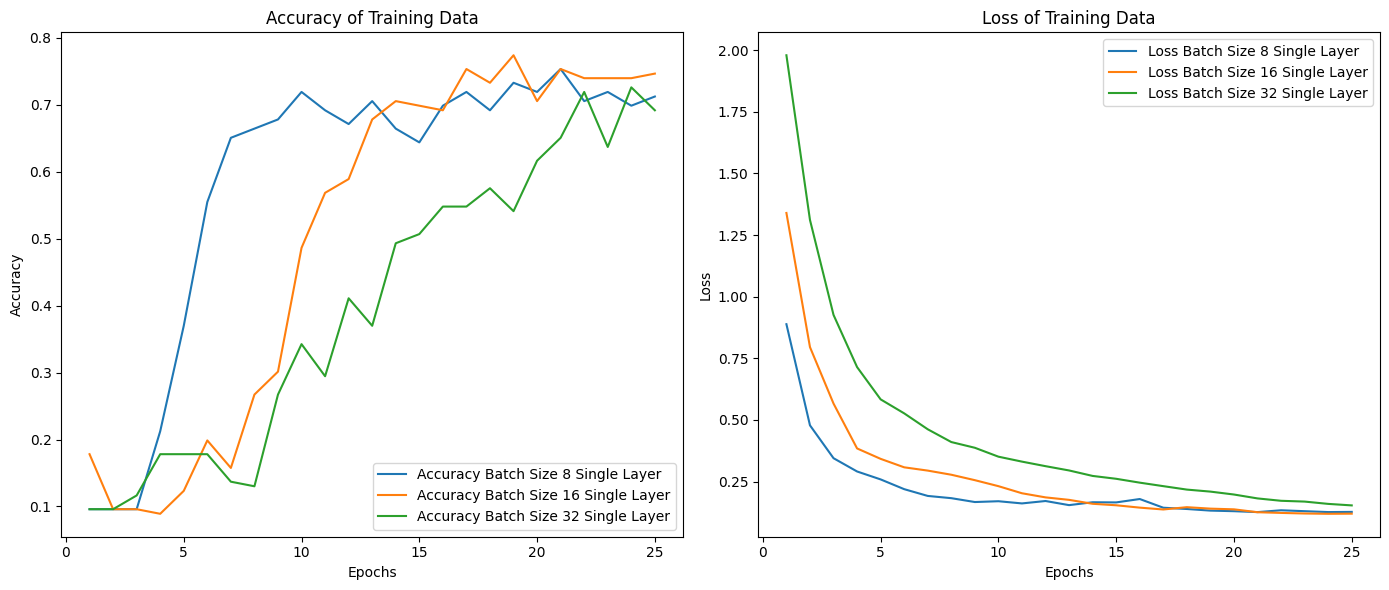

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss for each split
accuracy_70_30 = history.history['val_accuracy']
loss_70_30 = history.history['val_loss']

accuracy_80_20 = history16.history['val_accuracy']
loss_80_20 = history16.history['val_loss']

accuracy_90_10 = history32.history['val_accuracy']
loss_90_10 = history32.history['val_loss']

epochs_70_30 = range(1, len(accuracy_70_30) + 1)
epochs_80_20 = range(1, len(accuracy_80_20) + 1)
epochs_90_10 = range(1, len(accuracy_90_10) + 1)

# Plotting the results
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_70_30, accuracy_70_30, label='Accuracy Batch Size 8 Single Layer')
plt.plot(epochs_80_20, accuracy_80_20, label='Accuracy Batch Size 16 Single Layer')
plt.plot(epochs_90_10, accuracy_90_10, label='Accuracy Batch Size 32 Single Layer')
plt.title('Accuracy of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_70_30, loss_70_30, label='Loss Batch Size 8 Single Layer')
plt.plot(epochs_80_20, loss_80_20, label='Loss Batch Size 16 Single Layer')
plt.plot(epochs_90_10, loss_90_10, label='Loss Batch Size 32 Single Layer')
plt.title('Loss of Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step


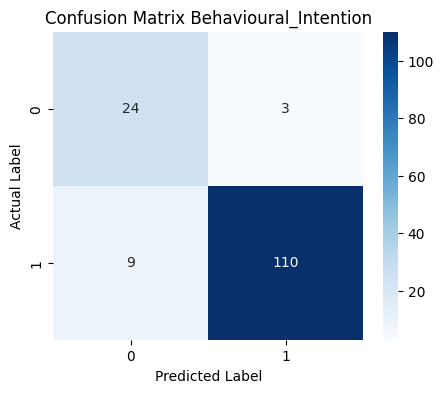

Accuracy: 0.9178082191780822
Precision: 0.8888888888888888
Recall: 0.7272727272727273
F1-score: 0.7999999999999999


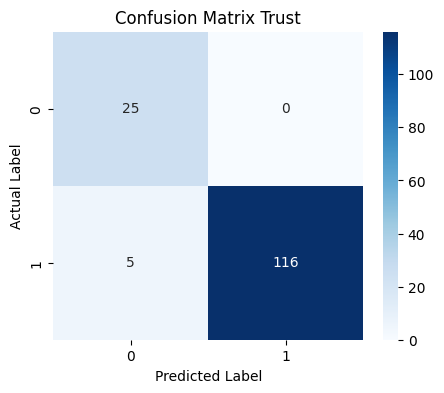

Accuracy: 0.9657534246575342
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091


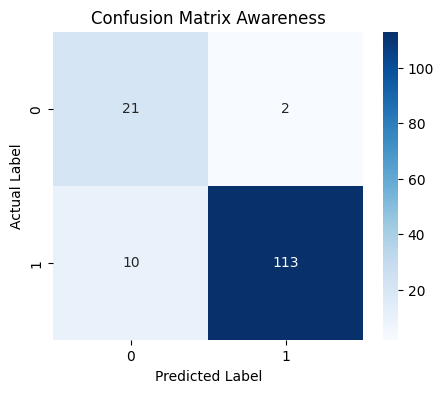

Accuracy: 0.9178082191780822
Precision: 0.9130434782608695
Recall: 0.6774193548387096
F1-score: 0.7777777777777777


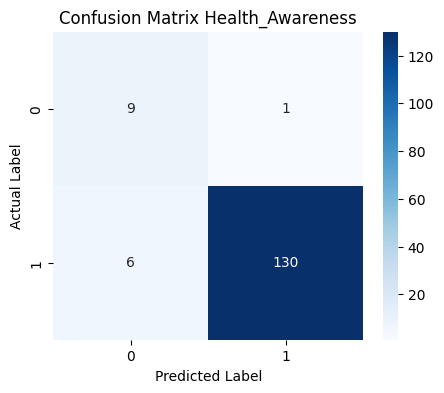

Accuracy: 0.952054794520548
Precision: 0.9
Recall: 0.6
F1-score: 0.7200000000000001


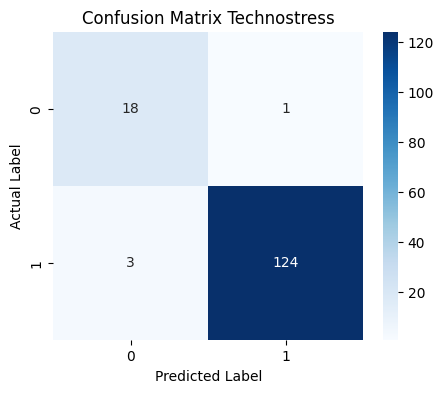

Accuracy: 0.9726027397260274
Precision: 0.9473684210526315
Recall: 0.8571428571428571
F1-score: 0.9


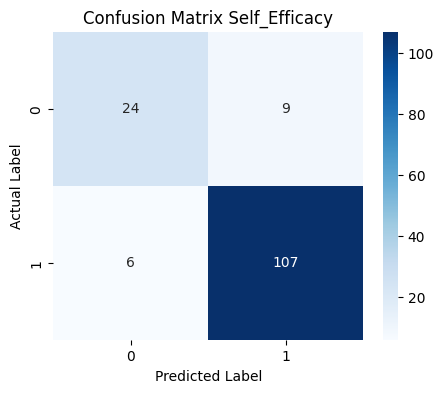

Accuracy: 0.8972602739726028
Precision: 0.7272727272727273
Recall: 0.8
F1-score: 0.761904761904762


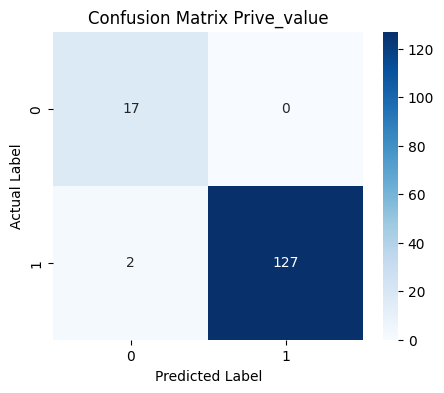

Accuracy: 0.9863013698630136
Precision: 1.0
Recall: 0.8947368421052632
F1-score: 0.9444444444444444


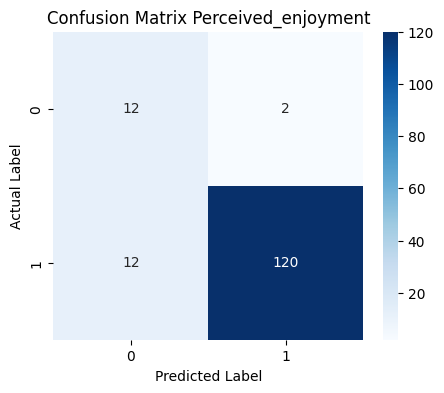

Accuracy: 0.9041095890410958
Precision: 0.8571428571428571
Recall: 0.5
F1-score: 0.631578947368421


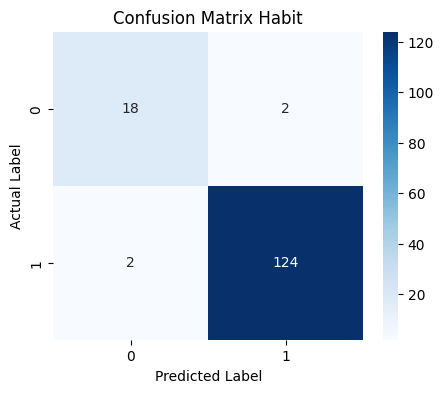

Accuracy: 0.9726027397260274
Precision: 0.9
Recall: 0.9
F1-score: 0.9


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Asumsikan model sudah dilatih dan aspect_columns sudah didefinisikan
y_pred1 = model16.predict(X_val)

for i, label_sm in enumerate(label_columns):
    # Ambil dua kolom yang sesuai dari y_pred untuk tiap aspek
    pred_aspek = y_pred1[:, i*2:i*2+2]

    # Ambil argmax dari prediksi untuk menentukan label dengan probabilitas tertinggi
    y_pred_aspect = np.argmax(pred_aspek, axis=1)

    # Ambil nilai dari y_pred sesuai dengan indeks argmax
    pred_values = pred_aspek[np.arange(pred_aspek.shape[0]), y_pred_aspect]

    # Terapkan kondisi >= 0.5
    y_pred_binary = pred_values >= 0.5

    # Ambil label asli dari y_test untuk tiap aspek
    y_aspect = y_val[:,  i*2:i*2+2]

    y_true_aspect = np.argmax(y_aspect, axis=1)

    y_true_values = y_aspect[np.arange(y_aspect.shape[0]), y_true_aspect]

    # Menghitung confusion matrix untuk tiap aspek
    cm = confusion_matrix(y_true_values, y_pred_binary)

    # Urutkan ulang elemen confusion matrix sesuai dengan permintaan
    cm_corrected = np.array([
        [cm[1, 1], cm[0, 1]],
        [cm[1, 0], cm[0, 0]]
    ])

    # Visualisasi confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_corrected, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix {label_sm}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_true_values, y_pred_binary)
    precision = precision_score(y_true_values, y_pred_binary)
    recall = recall_score(y_true_values, y_pred_binary)
    f1 = f1_score(y_true_values, y_pred_binary)

    # Print metrik evaluasi
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')


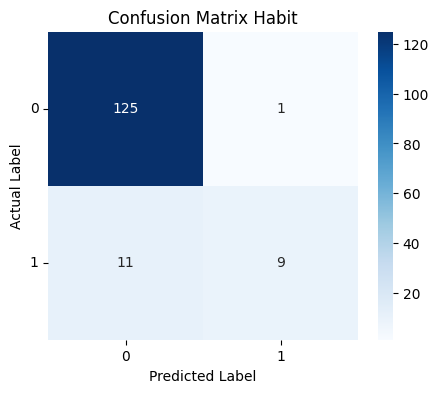

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cm = np.array([[125,1],
               [11, 9]])

# Membuat heatmap dengan TP di kanan bawah, termasuk color bar
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)  # cbar=True untuk menambahkan color bar

# Menyesuaikan label sumbu agar sesuai dengan kebalikan TP
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Habit')
plt.xticks(np.arange(2) + 0.5, ['0', '1'], rotation=0)
plt.yticks(np.arange(2) + 0.5, ['0', '1'], rotation=0)

plt.show()

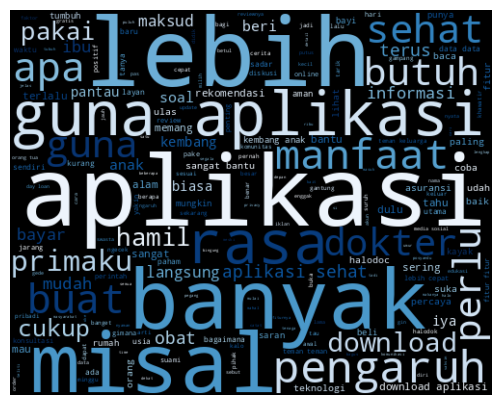

In [ ]:
from wordcloud import WordCloud

# Filter rows where 'Behavioural_Intention_1' is True
filtered_df = df_onehot2[df_onehot2['Behavioural_Intention_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


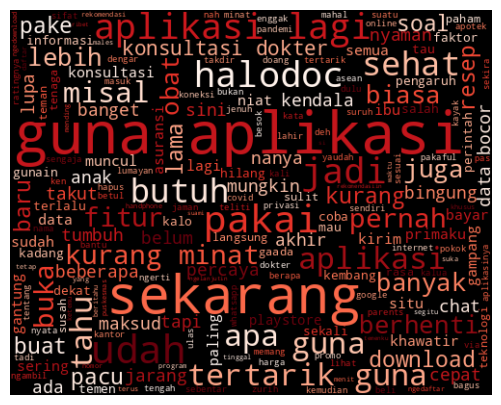

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Behavioural_Intention_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

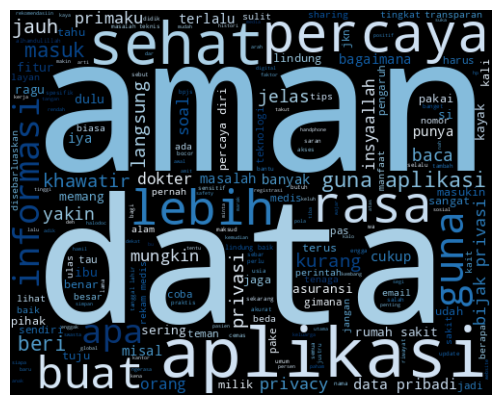

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Trust_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

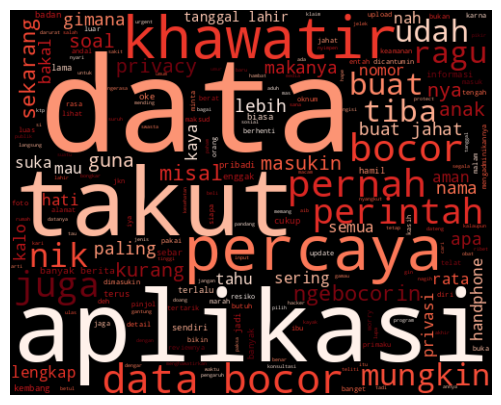

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Trust_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

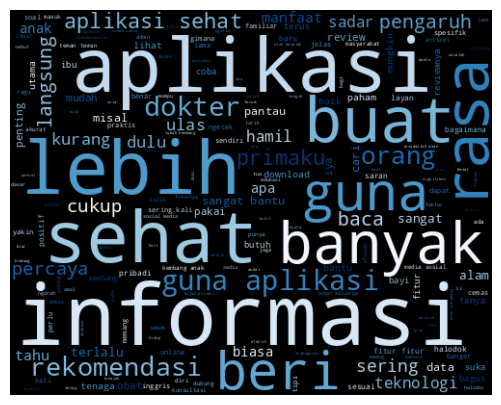

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Awareness_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

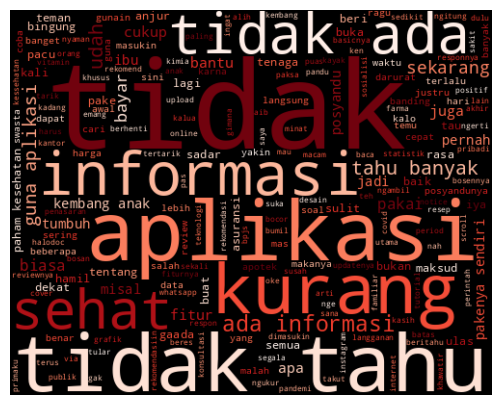

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Awareness_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

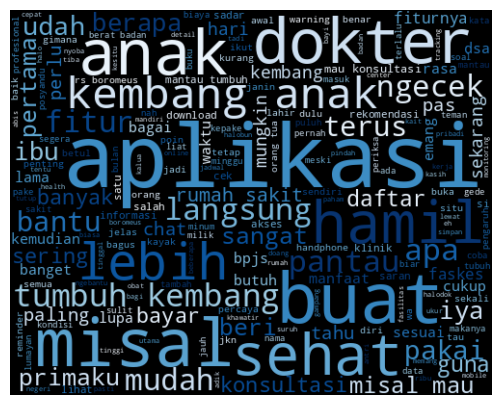

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Health_Awareness_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

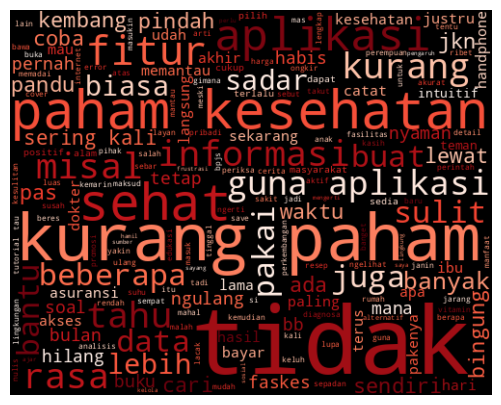

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Health_Awareness_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

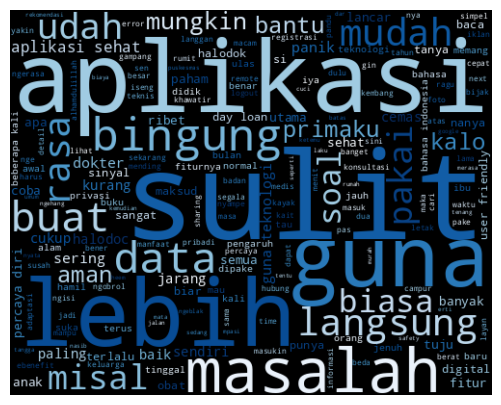

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Technostress_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

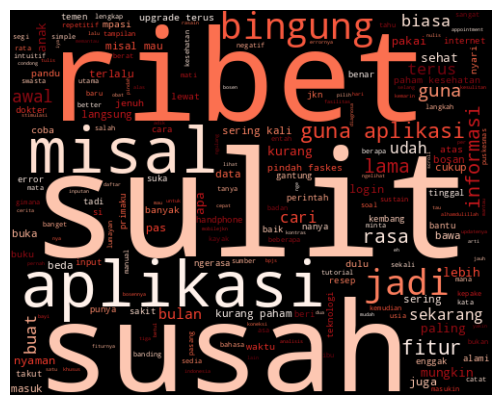

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Technostress_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

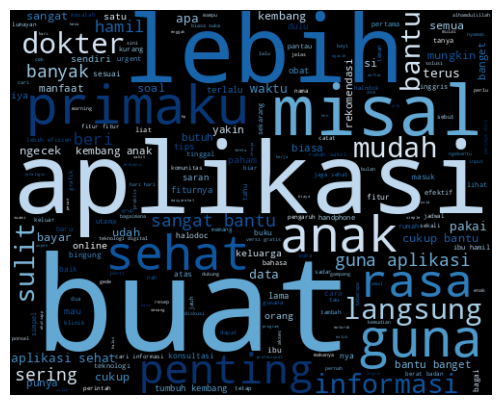

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Self_Efficacy_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

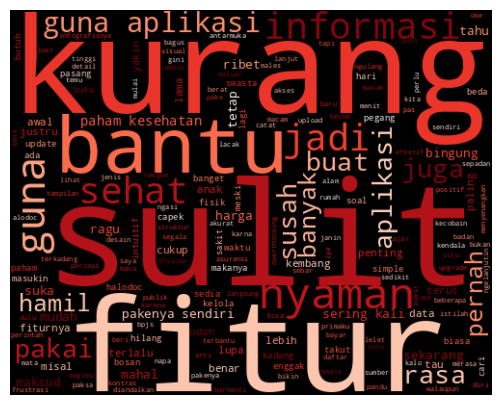

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Self_Efficacy_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

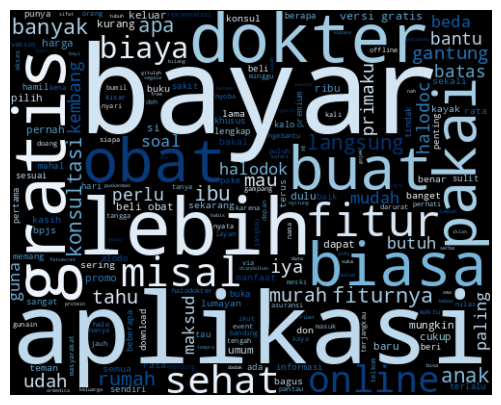

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Prive_value_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

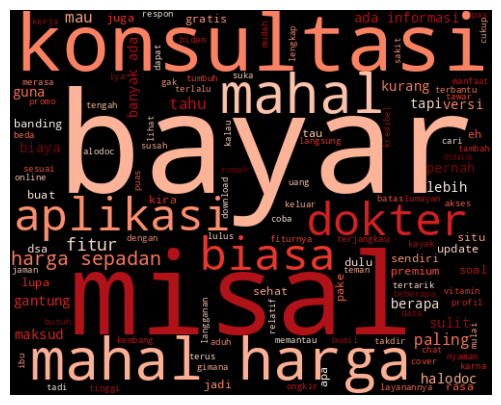

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Prive_value_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

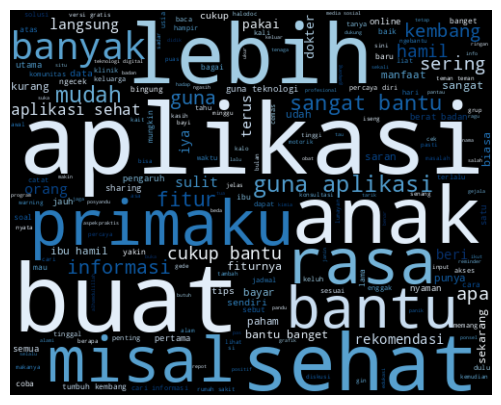

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Perceived_enjoyment_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

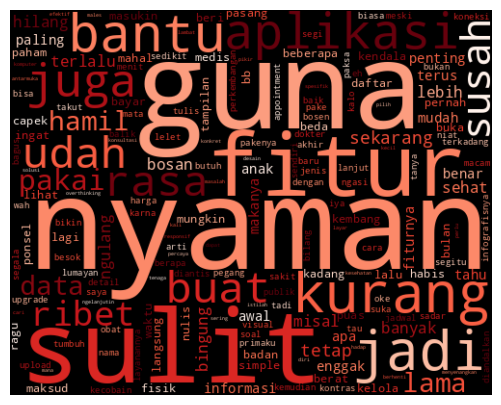

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Perceived_enjoyment_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

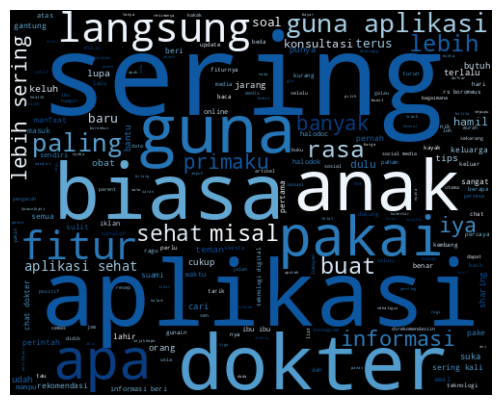

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Habit_1'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Generate word cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Blues').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

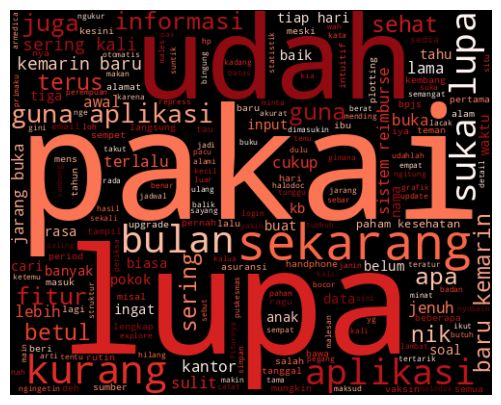

In [ ]:
from wordcloud import WordCloud
# Filter rows where 'Age_1' is True
filtered_df = df_onehot2[df_onehot2['Habit_2'] == True]

# Concatenate all text in 'processed_text' column
text = " ".join(filtered_df['processed_text'].astype(str).tolist())

# Remove the word "tidak" from the text
text = text.replace("tidak", "")

# Membuat word cloud
wordcloud = WordCloud(width=500, height=400,
                      background_color='black',
                      colormap='Reds').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()